In [20]:
%cd ~/Physics 331/331 Homework (Carla)/HW4
%ls

/home/cody/Physics 331/331 Homework (Carla)/HW4
hw04.pdf


In [133]:
%%writefile finite_well_NRG.py
import numpy as np
def finite_well_NRG(E):
    """
    Solves the transcendental equation for alowed energies in the 
    finite square well for the even wave functions. 
    
    Input
    ----------
    E: Energy of the particle, should always be negative
    """
    #First I want to define a few dumby variables to help simplify things
    m = 9.1093897e-31 #Mass of the electron (kg)
    hbar = 1.05457267e-34 #h bar (J*s)
    a = 0.52917721e-10 #Bohr radius, also the width of our finite well in the problem (m)
    U = -1.6022e-16 #Depth of the well (J)
    
    foo = 2 * m * a**2 * E / hbar**2
    bar = 2 * m * a**2 * (E-U) / hbar**2
    return np.sqrt(bar)*np.tan(np.sqrt(bar)) - np.sqrt(-foo)

Writing finite_well_NRG.py


In [134]:
%%writefile finite_well_NRG_deriv.py
import numpy as np
def finite_well_NRG_deriv(E):
    """
    Derivative of the function in finite_well_NRG
    
    Input
    ----------
    E: Energy of the particle, should always be negative
    """
    #First I want to define a few dumby variables to help simplify things
    m = 9.1093897e-31 #Mass of the electron (kg)
    hbar = 1.05457267e-34 #h bar (J*s)
    a = 0.52917721e-10 #Bohr radius, also the width of our finite well in the problem (m)
    U = -1.6022e-16 #Depth of the well (J)
    
    foo = 2 * m * a**2 * E / hbar**2
    bar = 2 * m * a**2 * (E-U) / hbar**2
    bob = 2 * m * a**2 / hbar**2
    
    part1 = 0.5 * np.power(bar, -1/2)* np.tan(np.sqrt(bar))* bob
    part2 = np.sqrt(bar) * (1/np.cos(np.sqrt(bar)))**2 * 0.5 * np.power(bar,-1/2) * bob
    part3 = -1/2 * np.power(-foo, -1/2) * -1 * bob
    return part1 + part2 + part3

Writing finite_well_NRG_deriv.py


In [135]:
%%writefile newton.py
def newton(func_name, deriv_name, x_guess):
    """
    Finds the roots of the input function func_name
    
    Inputs
    ----------
    function_name: Name of the function that we want to solve for. This should either be a built in function 
                   or a .py file name.
    deriv_name: Name of the derivative of function_name
    x_guess: Newton's Method needs and Initial guess at the solutions. Doesn't have to be a good guess. But the
             better the guess the faster you'll get to the correct answer
    
    Output
    ----------
    x_zero: Returns the value that gives f(x_zero) = 0
    """
    x_zero = x_guess
    
    for i in range(20):
        f = func_name(x_zero)
        fp = deriv_name(x_zero)
        delta_x = -f/fp
        x_zero += delta_x   #This is the same as x_zero = x_zero + delta_x
        
        if abs(delta_x) < 0.5e-5 * abs(x_zero):
            return x_zero
    print("Closest answer after 20 tries is", x_zero)
    return x_zero

Writing newton.py


In [116]:
# %load '/home/cody/Physics 331/Textbook Programs/Chapter 2/bisect.py'
import numpy as np
def bisect(func_name, x_left, x_rigt):
    """
    Find the solution the input equation f(x) = 0 for some input function. Start
    with the interval x_left x_rigt, and return a soltuion with a relative error
    0.5e-5.
    
    Input
    ----------
    func_name: This is the name of the function that I want to find roots for
    x_left: Smaller 'x' value I want to evaluate func_name at
    x_rigt: Higher 'x' value I want to evaluate func_name at
    
    Output
    ----------
    x_zero: 'x' value that returns func_name(x) = 0
    """
    f_left = func_name(x_left)
    f_rigt = func_name(x_rigt)
    #print("Function at the left: {} \nFunction at the right: {} ".format(f_left, f_rigt))
    if f_left * f_rigt > 0:     # Same sign on both sides
        return print("Both values give the same sign.") #Exit if inputs are wrong 
    
    while np.abs( x_rigt - x_left ) > 1.0e-5 * np.max(np.abs([x_left,x_rigt])):
        x_mp = 0.5*(x_left + x_rigt)
        f_mp = func_name(x_mp)
    
        if f_mp == 0:       # Got lucky and found the root exactly     
            return x_mp
        
        if f_mp * f_rigt > 0:
            x_rigt = x_mp
            f_rigt = f_mp
            
        else:
            x_left = x_mp
            f_left = f_mp
    x_zero = 0.5 * (x_left + x_rigt)
    
    return x_zero

    

In [118]:
bisect(finite_well_NRG,-1.56e-16, -1.55e-16)

-1.5591064453124996e-16

In [120]:
finite_well_NRG(-1.5591e-16)

0.00436490221759378

In [132]:
x_zero1 = newton(finite_well_NRG,finite_well_NRG_deriv,-1.57e-16)
print(x_zero1, finite_well_NRG(x_zero1))

-1.5591045754144357e-16 4.455991131635528e-11


<IPython.core.display.Javascript object>


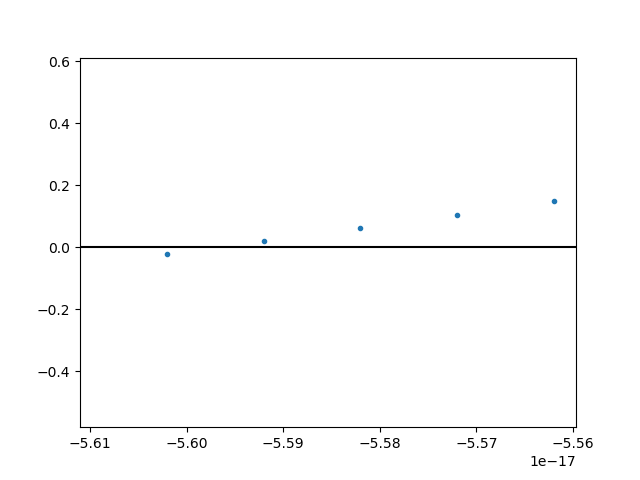

In [136]:
import matplotlib.pyplot as plt
%matplotlib notebook
E = np.arange(-1.6022e-16,0,1e-19)
plt.plot(E, finite_well_NRG(E),'.')
plt.hlines(0,min(E),max(E))
plt.ylim(-100,100)
plt.show()

In [139]:
x_zero2 = newton(finite_well_NRG, finite_well_NRG_deriv, -1.22e-16)
print(x_zero2,finite_well_NRG(x_zero2))

-1.2176031302262072e-16 5.933031843596837e-13


In [141]:
x_zero3 = newton(finite_well_NRG, finite_well_NRG_deriv, -5.57e-17)
print(x_zero3,finite_well_NRG(x_zero3))

-5.596855128377337e-17 8.881784197001252e-16
